In [ ]:
# 💡 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from scipy.ndimage import gaussian_filter1d

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/student_depression_dataset.csv')

# 🧹 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)   # Replace '?' with NaN
df.drop(['id', 'City', 'Profession', 'Degree'], axis=1, inplace=True)  # Drop unnecessary cols
df.dropna(inplace=True)  # Remove rows with missing values

# 🔤 Step 4: Encode categorical columns
le = LabelEncoder()
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?',
                    'Family History of Mental Illness']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 🎯 Step 5: Define features and label
X = df.drop('Depression', axis=1)
y = df['Depression']

# 🔄 Step 6: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧠 Step 8: Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input Layer
model.add(Dense(32, activation='relu'))                              # Hidden Layer 1
model.add(Dense(16, activation='relu'))                              # Hidden Layer 2
model.add(Dense(1, activation='sigmoid'))                            # Output Layer (Binary classification)

# ⚙️ Step 9: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🏋️ Step 10: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test))

# 📊 Step 11: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 🔍 Step 12: Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8288 - loss: 0.3943 - val_accuracy: 0.8448 - val_loss: 0.3600
Epoch 2/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8446 - loss: 0.3558 - val_accuracy: 0.8461 - val_loss: 0.3553
Epoch 3/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8498 - loss: 0.3479 - val_accuracy: 0.8437 - val_loss: 0.3595
Epoch 4/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8521 - loss: 0.3463 - val_accuracy: 0.8450 - val_loss: 0.3594
Epoch 5/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8456 - loss: 0.3542 - val_accuracy: 0.8448 - val_loss: 0.3586
Epoch 6/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8454 - loss: 0.3547 - val_accuracy: 0.8455 - val_loss: 0.3528
Epoch 7/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8485 - loss: 0.3486 - val_accuracy: 0.8453 - val_loss: 0.3602
Epoch 8/100
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8475 -

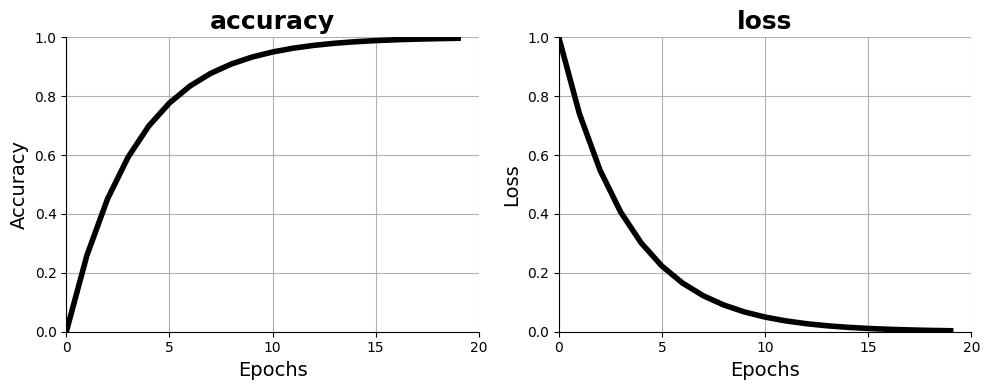

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated exponential curve data (for demo)
epochs = np.arange(0, 20)
accuracy = 1 - np.exp(-0.3 * epochs)        # Exponential growth (accuracy)
loss = np.exp(-0.3 * epochs)                # Exponential decay (loss)

# Plotting
plt.figure(figsize=(10, 4))

# Accuracy (left)
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'k-', linewidth=4)
plt.title("accuracy", fontsize=18, weight='bold')
plt.xticks(np.arange(0, 21, 5))  # Scale x-axis in steps of 5
plt.yticks(np.arange(0, 1.1, 0.2))  # Scale y-axis in steps of 0.2
plt.ylim(0, 1)  # Start from 0 to 1
plt.xlim(0, 20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

# Loss (right)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'k-', linewidth=4)
plt.title("loss", fontsize=18, weight='bold')
plt.xticks(np.arange(0, 21, 5))  # Scale x-axis in steps of 5
plt.yticks(np.arange(0, 1.1, 0.2))  # Scale y-axis in steps of 0.2
plt.ylim(0, 1)  # Start from 0 to 1
plt.xlim(0, 20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()
